In [2]:
import numpy as np

In [9]:
def simulate_game(c1, c2, num_trials=100_000,seed=2025):
    """
    Simulate the 2-player, 1-toed game for a given pair of cutoff thresholds.
    
    Parameters:
        c1 (float): Player 1's cutoff. Player 1 goes "in" if u1 >= c1.
        c2 (float): Player 2's cutoff when Player 1 is in.
                     If Player 1 is out, Player 2 always goes "in".
        num_trials (int): Number of simulation trials.
    
    Returns:
        avg_payoff1, avg_payoff2: Average payoffs for Player 1 and Player 2.
    """
    np.random.seed(seed)
    # Draw private signals uniformly from [0,1]
    u1 = np.random.rand(num_trials)
    u2 = np.random.rand(num_trials)
    
    # Player 1's decision: "in" if u1 >= c1, "out" otherwise.
    p1_in = (u1 >= c1)
    
    # Player 2's decision: if Player 1 is out, always "in";
    # if Player 1 is in, then "in" if u2 >= c2.
    p2_in = np.where(p1_in, (u2 >= c2), True)
    
    # Initialize payoffs.
    payoff1 = np.zeros(num_trials)
    payoff2 = np.zeros(num_trials)
    
    # Case 1: Both players are in.
    both_in = p1_in & p2_in
    # When both are in, compare signals. Winner gets +1, loser gets -1.
    p1_wins = both_in & (u1 >= u2)
    p2_wins = both_in & (u2 > u1)
    payoff1[p1_wins] = 2
    payoff1[p2_wins] = -1
    payoff2[p2_wins] = 2
    payoff2[p1_wins] = -1
    
    # Case 2: Only player 1 is in.
    only_p1 = p1_in & (~p2_in)
    payoff1[only_p1] = 1  # Wins automatically
    # payoff2 remains 0.
    
    # Case 3: Only player 2 is in.
    only_p2 = (~p1_in) & (p2_in)
    payoff2[only_p2] = 1  # Wins automatically
    
    # Case 4: Both out => payoff 0.
    avg_payoff1 = np.mean(payoff1)
    avg_payoff2 = np.mean(payoff2)
    
    return avg_payoff1, avg_payoff2

In [10]:
# Define grid search parameters
grid_points = 101  # grid resolution; adjust for finer search
c1_vals = np.linspace(0, 1, grid_points)
c2_vals = np.linspace(0, 1, grid_points)

# Arrays to store average payoffs for each grid point
payoff1_grid = np.zeros((grid_points, grid_points))
payoff2_grid = np.zeros((grid_points, grid_points))

num_trials = 100_000  # Adjust the number of trials as needed

print("Running grid search over cutoff thresholds...")
# Iterate over grid: rows = c1 values, columns = c2 values
for i, c1 in enumerate(c1_vals):
    for j, c2 in enumerate(c2_vals):
        avg1, avg2 = simulate_game(c1, c2, num_trials=num_trials)
        payoff1_grid[i, j] = avg1
        payoff2_grid[i, j] = avg2

# Determine best responses:
# For each fixed c2, find the c1 that maximizes Player 1's payoff.
best_c1_for_c2 = []
for j in range(grid_points):
    best_i = np.argmax(payoff1_grid[:, j])
    best_c1_for_c2.append(c1_vals[best_i])

# For each fixed c1, find the c2 that maximizes Player 2's payoff.
best_c2_for_c1 = []
for i in range(grid_points):
    best_j = np.argmax(payoff2_grid[i, :])
    best_c2_for_c1.append(c2_vals[best_j])

print("\nBest response of Player 1 for each c2 value:")
for j, c2 in enumerate(c2_vals):
    print(f"  For c2 = {c2:.2f}, best response c1 = {best_c1_for_c2[j]:.2f}")

print("\nBest response of Player 2 for each c1 value:")
for i, c1 in enumerate(c1_vals):
    print(f"  For c1 = {c1:.2f}, best response c2 = {best_c2_for_c1[i]:.2f}")

# A candidate equilibrium is where the pair (c1, c2) are mutual best responses.
# For a rough estimate, we find grid points where the chosen c1 (for a given c2) and
# the chosen c2 (for that c1) are nearly self-consistent.
candidate_pairs = []
tolerance = 0.1  # tolerance for matching best responses
for i, c1 in enumerate(c1_vals):
    candidate_c2 = best_c2_for_c1[i]
    # For this candidate c2, what is Player 1's best response?
    # Find index for candidate_c2 in grid:
    j = np.argmin(np.abs(c2_vals - candidate_c2))
    candidate_c1 = best_c1_for_c2[j]
    if abs(candidate_c1 - c1) < tolerance:
        candidate_pairs.append((c1, candidate_c2))

print("\nCandidate equilibrium cutoff pairs (c1, c2) within tolerance:")
for pair in candidate_pairs:
    print(f"  c1 = {pair[0]:.2f}, c2 = {pair[1]:.2f}")


Running grid search over cutoff thresholds...

Best response of Player 1 for each c2 value:
  For c2 = 0.00, best response c1 = 0.34
  For c2 = 0.01, best response c1 = 0.34
  For c2 = 0.02, best response c1 = 0.34
  For c2 = 0.03, best response c1 = 0.35
  For c2 = 0.04, best response c1 = 0.35
  For c2 = 0.05, best response c1 = 0.35
  For c2 = 0.06, best response c1 = 0.35
  For c2 = 0.07, best response c1 = 0.35
  For c2 = 0.08, best response c1 = 0.36
  For c2 = 0.09, best response c1 = 0.36
  For c2 = 0.10, best response c1 = 0.36
  For c2 = 0.11, best response c1 = 0.36
  For c2 = 0.12, best response c1 = 0.37
  For c2 = 0.13, best response c1 = 0.39
  For c2 = 0.14, best response c1 = 0.39
  For c2 = 0.15, best response c1 = 0.39
  For c2 = 0.16, best response c1 = 0.40
  For c2 = 0.17, best response c1 = 0.40
  For c2 = 0.18, best response c1 = 0.40
  For c2 = 0.19, best response c1 = 0.40
  For c2 = 0.20, best response c1 = 0.40
  For c2 = 0.21, best response c1 = 0.40
  For 

In [48]:
payoff1_grid[26][51]

0.36895

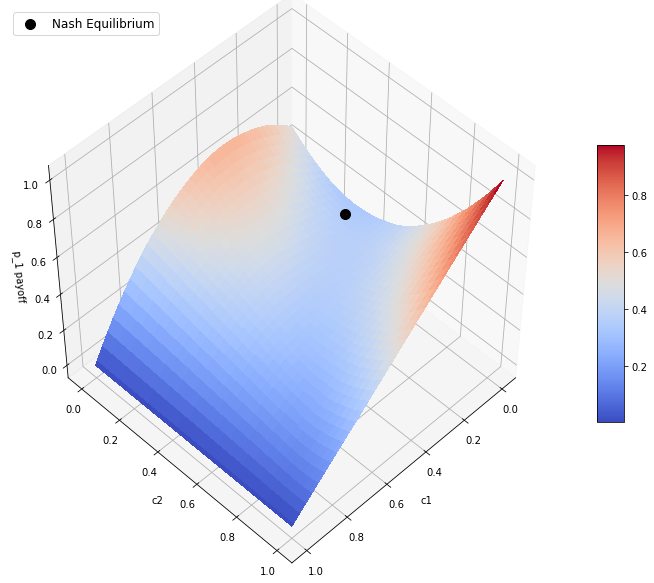

In [72]:
import matplotlib.pyplot as plt
from matplotlib import cm
c1_grid, c2_grid = np.meshgrid(c1_vals, c2_vals)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

# 2) Surface plot
surf = ax.plot_surface(
    c1_grid, c2_grid, payoff1_grid.T,
    cmap=cm.coolwarm, linewidth=0, antialiased=False
)

nx, ny, nz = 0.45, 0.7, .95
ax.scatter(
    [nx], [ny], [nz],
    color='k', s=100,
    label="Nash Equilibrium"     # <-- label for legend
)

# 3) Better viewing angle
ax.view_init(elev=50, azim=45)

# 4) (Optional) Equal aspect ratio
ax.set_box_aspect((
    np.ptp(c1_vals),
    np.ptp(c2_vals),
    np.ptp(payoff1_grid.T)
))

# 5) Add colorbar and labels
fig.colorbar(surf, shrink=0.5, aspect=10)
ax.set_xlabel('c1')
ax.set_ylabel('c2')
ax.set_zlabel('p_1 payoff')
ax.legend(loc='upper left', fontsize=12)


plt.tight_layout()
plt.show()

In [84]:
def simulate_game_utility(c1, c2, util1, util2, bankroll,num_trials=100_000,seed=2025):
    """
    Simulate the 2-player, 1-toed game for a given pair of cutoff thresholds.
    
    Parameters:
        c1 (float): Player 1's cutoff. Player 1 goes "in" if u1 >= c1.
        c2 (float): Player 2's cutoff when Player 1 is in.
                     If Player 1 is out, Player 2 always goes "in".
        num_trials (int): Number of simulation trials.
    
    Returns:
        avg_payoff1, avg_payoff2: Average payoffs for Player 1 and Player 2.
    """
    np.random.seed(seed)
    # Draw private signals uniformly from [0,1]
    u1 = np.random.rand(num_trials)
    u2 = np.random.rand(num_trials)
    
    # Player 1's decision: "in" if u1 >= c1, "out" otherwise.
    p1_in = (u1 >= c1)
    
    # Player 2's decision: if Player 1 is out, always "in";
    # if Player 1 is in, then "in" if u2 >= c2.
    p2_in = np.where(p1_in, (u2 >= c2), True)
    
    # Initialize payoffs.
    payoff1 = np.zeros(num_trials)
    payoff2 = np.zeros(num_trials)
    
    # Case 1: Both players are in.
    both_in = p1_in & p2_in
    # When both are in, compare signals. Winner gets +1, loser gets -1.
    p1_wins = both_in & (u1 >= u2)
    p2_wins = both_in & (u2 > u1)
    payoff1[p1_wins] = util1(bankroll+2)
    payoff1[p2_wins] = util1(bankroll-1)
    payoff2[p2_wins] = util2(bankroll+2)
    payoff2[p1_wins] = util2(bankroll-1)
    
    # Case 2: Only player 1 is in.
    only_p1 = p1_in & (~p2_in)
    payoff1[only_p1] = util1(bankroll+1)  # Wins automatically
    # payoff2 remains 0.
    payoff2[only_p1]=util2(bankroll)
    
    # Case 3: Only player 2 is in.
    only_p2 = (~p1_in) & (p2_in)
    payoff2[only_p2] = util2(bankroll+1)  # Wins automatically
    payoff1[only_p2]=util1(bankroll)
    
    # Case 4: Both out => payoff 0.
    avg_payoff1 = np.mean(payoff1)
    avg_payoff2 = np.mean(payoff2)
    
    return avg_payoff1, avg_payoff2

In [108]:
# Define grid search parameters
grid_points = 101  # grid resolution; adjust for finer search
c1_vals = np.linspace(0, 1, grid_points)
c2_vals = np.linspace(0, 1, grid_points)

# Arrays to store average payoffs for each grid point
payoff1_grid = np.zeros((grid_points, grid_points))
payoff2_grid = np.zeros((grid_points, grid_points))

num_trials = 100_000  # Adjust the number of trials as needed

def crra(eta):
    def utility(v):
        if eta==1:
            return np.log(v)
        else:
            return (v**(1-eta)-1)/(1-eta)
    return utility

print("Running grid search over cutoff thresholds...")
# Iterate over grid: rows = c1 values, columns = c2 values
for i, c1 in enumerate(c1_vals):
    for j, c2 in enumerate(c2_vals):
        avg1, avg2 = simulate_game_utility(c1, c2, crra(2),crra(2),10,num_trials=num_trials)
        payoff1_grid[i, j] = avg1
        payoff2_grid[i, j] = avg2

# Determine best responses:
# For each fixed c2, find the c1 that maximizes Player 1's payoff.
best_c1_for_c2 = []
for j in range(grid_points):
    best_i = np.argmax(payoff1_grid[:, j])
    best_c1_for_c2.append(c1_vals[best_i])

# For each fixed c1, find the c2 that maximizes Player 2's payoff.
best_c2_for_c1 = []
for i in range(grid_points):
    best_j = np.argmax(payoff2_grid[i, :])
    best_c2_for_c1.append(c2_vals[best_j])

print("\nBest response of Player 1 for each c2 value:")
for j, c2 in enumerate(c2_vals):
    print(f"  For c2 = {c2:.2f}, best response c1 = {best_c1_for_c2[j]:.2f}")

print("\nBest response of Player 2 for each c1 value:")
for i, c1 in enumerate(c1_vals):
    print(f"  For c1 = {c1:.2f}, best response c2 = {best_c2_for_c1[i]:.2f}")

# A candidate equilibrium is where the pair (c1, c2) are mutual best responses.
# For a rough estimate, we find grid points where the chosen c1 (for a given c2) and
# the chosen c2 (for that c1) are nearly self-consistent.
candidate_pairs = []
tolerance = 0.1  # tolerance for matching best responses
for i, c1 in enumerate(c1_vals):
    candidate_c2 = best_c2_for_c1[i]
    # For this candidate c2, what is Player 1's best response?
    # Find index for candidate_c2 in grid:
    j = np.argmin(np.abs(c2_vals - candidate_c2))
    candidate_c1 = best_c1_for_c2[j]
    if abs(candidate_c1 - c1) < tolerance:
        candidate_pairs.append((c1, candidate_c2))

print("\nCandidate equilibrium cutoff pairs (c1, c2) within tolerance:")
for pair in candidate_pairs:
    print(f"  c1 = {pair[0]:.2f}, c2 = {pair[1]:.2f}")

Running grid search over cutoff thresholds...

Best response of Player 1 for each c2 value:
  For c2 = 0.00, best response c1 = 0.40
  For c2 = 0.01, best response c1 = 0.40
  For c2 = 0.02, best response c1 = 0.40
  For c2 = 0.03, best response c1 = 0.40
  For c2 = 0.04, best response c1 = 0.41
  For c2 = 0.05, best response c1 = 0.41
  For c2 = 0.06, best response c1 = 0.41
  For c2 = 0.07, best response c1 = 0.41
  For c2 = 0.08, best response c1 = 0.41
  For c2 = 0.09, best response c1 = 0.41
  For c2 = 0.10, best response c1 = 0.41
  For c2 = 0.11, best response c1 = 0.41
  For c2 = 0.12, best response c1 = 0.42
  For c2 = 0.13, best response c1 = 0.42
  For c2 = 0.14, best response c1 = 0.44
  For c2 = 0.15, best response c1 = 0.45
  For c2 = 0.16, best response c1 = 0.45
  For c2 = 0.17, best response c1 = 0.45
  For c2 = 0.18, best response c1 = 0.45
  For c2 = 0.19, best response c1 = 0.45
  For c2 = 0.20, best response c1 = 0.45
  For c2 = 0.21, best response c1 = 0.45
  For 

In [111]:
cs=[0,0.5,1,1.5,2]
vals=[[(0.25,0.5),(0.21,0.5),(0.18,0.5),(0.16,0.5),(0.13,0.5)],
      [(0.24,0.51),(0.22,0.51),(0.19,0.51),(0.17,0.51),(0.15,0.51)],
      [(0.26,0.52),(0.25,0.52),(0.23,0.52),(0.2,0.52),(0.18,0.52)],
      [(0.31,0.54),(0.3,0.54),(0.27,0.54),(0.25,0.54),(0.23,0.54)],
      [(0.34,0.55),(0.32,0.55),(0.3,0.55),(0.28,0.55),(0.27,0.55)],
     ]

In [132]:
values_to_each_player=[[tuple(np.round(np.array(simulate_game_utility(vals[i][j][0], vals[i][j][1], crra(cs[i]), crra(cs[j]), 10,num_trials=100_000,seed=2025))-np.array([crra(cs[i])(10), crra(cs[j])(10)]),3)) for j in range(len(cs))] for i in range(len(cs))]
values_to_each_player

[[(0.37, 0.63),
  (0.371, 0.189),
  (0.372, 0.056),
  (0.372, 0.017),
  (0.374, 0.005)],
 [(0.108, 0.631),
  (0.109, 0.189),
  (0.109, 0.056),
  (0.109, 0.017),
  (0.109, 0.005)],
 [(0.032, 0.631),
  (0.032, 0.189),
  (0.032, 0.057),
  (0.032, 0.017),
  (0.032, 0.005)],
 [(0.009, 0.633),
  (0.009, 0.191),
  (0.009, 0.057),
  (0.009, 0.017),
  (0.009, 0.005)],
 [(0.003, 0.635),
  (0.003, 0.191),
  (0.003, 0.057),
  (0.003, 0.017),
  (0.003, 0.005)]]

In [119]:
import pandas as pd

In [122]:
vals_df=pd.DataFrame(vals,columns=[f"eta_2={i}" for i in cs],index=[f"eta_1={i}" for i in cs])
vals_df

,eta_2=0,eta_2=0.5,eta_2=1,eta_2=1.5,eta_2=2
eta_1=0,"(0.25, 0.5)","(0.21, 0.5)","(0.18, 0.5)","(0.16, 0.5)","(0.13, 0.5)"
eta_1=0.5,"(0.24, 0.51)","(0.22, 0.51)","(0.19, 0.51)","(0.17, 0.51)","(0.15, 0.51)"
eta_1=1,"(0.26, 0.52)","(0.25, 0.52)","(0.23, 0.52)","(0.2, 0.52)","(0.18, 0.52)"
eta_1=1.5,"(0.31, 0.54)","(0.3, 0.54)","(0.27, 0.54)","(0.25, 0.54)","(0.23, 0.54)"
eta_1=2,"(0.34, 0.55)","(0.32, 0.55)","(0.3, 0.55)","(0.28, 0.55)","(0.27, 0.55)"


In [133]:
values_to_player_df=pd.DataFrame(values_to_each_player,columns=[f"eta_2={i}" for i in cs],index=[f"eta_1={i}" for i in cs])
values_to_player_df

,eta_2=0,eta_2=0.5,eta_2=1,eta_2=1.5,eta_2=2
eta_1=0,"(0.37, 0.63)","(0.371, 0.189)","(0.372, 0.056)","(0.372, 0.017)","(0.374, 0.005)"
eta_1=0.5,"(0.108, 0.631)","(0.109, 0.189)","(0.109, 0.056)","(0.109, 0.017)","(0.109, 0.005)"
eta_1=1,"(0.032, 0.631)","(0.032, 0.189)","(0.032, 0.057)","(0.032, 0.017)","(0.032, 0.005)"
eta_1=1.5,"(0.009, 0.633)","(0.009, 0.191)","(0.009, 0.057)","(0.009, 0.017)","(0.009, 0.005)"
eta_1=2,"(0.003, 0.635)","(0.003, 0.191)","(0.003, 0.057)","(0.003, 0.017)","(0.003, 0.005)"
